In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2025-04-18 15:49:37.566310: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 15:49:37.974455: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 15:49:38.301629: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744980578.588420    5567 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744980578.663470    5567 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744980579.279258    5567 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

2.19.0


In [3]:
a = tf.constant([[1,2],[3,4]])
print(a)
a = tf.random.normal(shape=(10,3))
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-1.296533    1.964634   -0.13534766]
 [-0.8697801   0.6480674  -0.14582518]
 [ 0.11347812 -0.6666227   1.2697934 ]
 [ 1.6674975   1.41918    -1.6746067 ]
 [ 0.6599529   0.18557562 -0.3171452 ]
 [-0.18897922 -0.72494525  1.6163296 ]
 [ 1.4349558   0.12525599  0.33311215]
 [ 0.69647014  0.23802787 -1.5317138 ]
 [-0.57999045  0.9952556   1.0030856 ]
 [ 0.31878582 -0.2906592   1.161229  ]], shape=(10, 3), dtype=float32)


2025-04-18 15:54:22.034521: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
print(a-a[0])
print(tf.exp(a)[0].numpy())

tf.Tensor(
[[ 0.          0.          0.        ]
 [ 0.42675287 -1.3165665  -0.01047751]
 [ 1.410011   -2.6312566   1.4051411 ]
 [ 2.9640305  -0.5454539  -1.539259  ]
 [ 1.9564859  -1.7790583  -0.18179753]
 [ 1.1075537  -2.6895792   1.7516773 ]
 [ 2.7314887  -1.839378    0.4684598 ]
 [ 1.9930031  -1.7266061  -1.3963661 ]
 [ 0.71654254 -0.96937835  1.1384332 ]
 [ 1.6153188  -2.2552931   1.2965767 ]], shape=(10, 3), dtype=float32)
[0.2734783 7.1323013 0.8734122]


In [6]:
s = tf.Variable(tf.zeros_like(a[0]))
for i in a:
    s.assign_add(i)

print(s)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1.9558574, 3.8937695, 1.5789111], dtype=float32)>


In [7]:
tf.reduce_sum(a,axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.9558574, 3.8937695, 1.5789111], dtype=float32)>

In [ ]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))

with tf.GradientTape() as tape:
    tape.watch(a)
    c= tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
    print(dc_da)

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

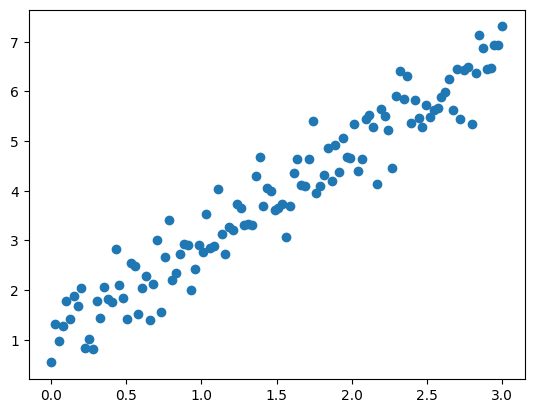

In [23]:
np.random.seed(13)

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

plt.scatter(train_x,train_labels)

In [30]:
input_dim = 1
output_dim = 1
learning_rate = 0.1

w = tf.Variable([[100.0]])
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def f(x):
    return tf.matmul(x,w) + b

def compute_loss(labels,predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

In [31]:
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        predictions = f(x)
        loss = compute_loss(y, predictions)    
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss
    

In [32]:
indices = np.random.permutation(len(train_x))
features = tf.constant(train_x[indices], dtype=tf.float32)
labels = tf.constant(train_labels[indices],dtype=tf.float32)

In [ ]:
batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        loss = train_on_batch(tf.reshape(features[i:i+batch_size], (-1,1)),tf.reshape(labels[i:i+batch_size],(-1,1)))
        print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 11212.1211
Epoch 0: last batch loss = 5468.1289
Epoch 0: last batch loss = 7304.0566
Epoch 0: last batch loss = 500.2587
Epoch 0: last batch loss = 519.4969
Epoch 0: last batch loss = 227.0221
Epoch 0: last batch loss = 382.5918
Epoch 0: last batch loss = 277.4458
Epoch 0: last batch loss = 536.8304
Epoch 0: last batch loss = 467.5684
Epoch 0: last batch loss = 367.3214
Epoch 0: last batch loss = 521.6855
Epoch 0: last batch loss = 176.9613
Epoch 0: last batch loss = 338.4565
Epoch 0: last batch loss = 90.6623
Epoch 0: last batch loss = 164.4886
Epoch 0: last batch loss = 30.0692
Epoch 0: last batch loss = 304.4500
Epoch 0: last batch loss = 189.5940
Epoch 0: last batch loss = 109.0936
Epoch 0: last batch loss = 230.4593
Epoch 0: last batch loss = 176.7120
Epoch 0: last batch loss = 167.2293
Epoch 0: last batch loss = 133.4223
Epoch 0: last batch loss = 203.3217
Epoch 0: last batch loss = 99.7180
Epoch 0: last batch loss = 50.4039
Epoch 0: last batch loss = 2

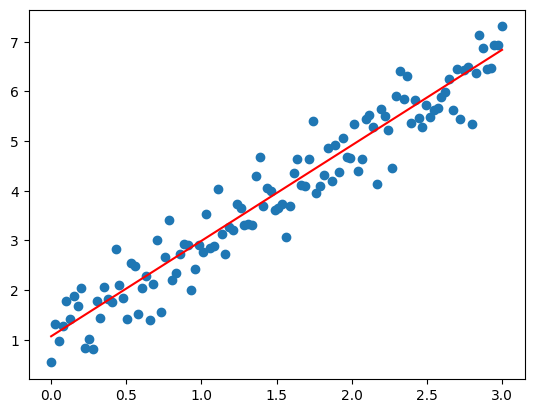

In [34]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])
y = w.numpy()[0,0]*x+b.numpy()[0]
plt.plot(x,y,color='red')